In [2]:
import os
def eachFile(filepath):                 #将目录内的文件名放入列表中
    pathDir =  os.listdir(filepath)
    out = []
    for allDir in pathDir:
        print(allDir)
        #child = allDir.decode('gbk')    # .decode('gbk')是解决中文显示乱码问题
        out.append(allDir)
    return out

In [3]:
train_data_dir = '/mnt/iphdata/'
test_data_dir = './test'
from keras.utils import np_utils, conv_utils

Using TensorFlow backend.


In [5]:
#out = eachFile(train_data_dir)
Width = 64
Height = 64
num_classes = 2 
pic_dir_out = '/mnt/pic_cnn/pic_out/'  
pic_dir_data = './dest'  

In [8]:
#import cv2
import numpy as np
import matplotlib.image as mpimg
def get_data(data_name,train_percentage=0.9,resize=True,data_format=None):   #从文件夹中获取图像数据
    #file_name = os.path.join(pic_dir_out,data_name +".pkl")   
    #if os.path.exists(file_name):           #判断之前是否有存到文件中
        #(X_train, y_train), (X_test, y_test) = cPickle.load(open(file_name,"rb"))
        #return (X_train, y_train), (X_test, y_test)  
    #data_format = conv_utils.normalize_data_format(data_format)
    #print(data_format)
    pic_dir_set = eachFile(pic_dir_data)  
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    label = 0
    for pic_dir in pic_dir_set:
        print(pic_dir_data+pic_dir)
        if not os.path.isdir(os.path.join(pic_dir_data,pic_dir)):
            continue    
        pic_set = eachFile(os.path.join(pic_dir_data,pic_dir))
        pic_index = 0
        train_count = int(len(pic_set)*train_percentage)
        for pic_name in pic_set:
            if not os.path.isfile(os.path.join(pic_dir_data,pic_dir,pic_name)):
                continue
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
            img = mpimg.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
            print(img.shape)
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name),0)
            if img is None:
                continue
            #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            #if (resize):
                #img = cv2.resize(img,(Width,Height))
            #if (data_format == 'channels_last'):
                #img = img.reshape(-1,Width,Height,1)
           # elif (data_format == 'channels_first'):
               # img = img.reshape(-1,1,Width,Height)
            if (pic_index < train_count):
                X_train.append(img)
                y_train.append(label)          
            else:
                X_test.append(img)
                y_test.append(label)
            pic_index += 1
        if len(pic_set) > 0:        
            label += 1
    X_train = np.array(X_train)        
    X_test = np.array(X_test)    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    #cPickle.dump([(X_train, y_train), (X_test, y_test)],open(file_name,"wb")) 
    return X_train, y_train, X_test, y_test 

In [8]:
import cv2
import numpy as np
import matplotlib.image as mpimg
def get_data(train_percentage=1.0,resize=True,data_format=None):   #从文件夹中获取图像数据
    #file_name = os.path.join(pic_dir_out,data_name +".pkl")   
    #if os.path.exists(file_name):           #判断之前是否有存到文件中
        #(X_train, y_train), (X_test, y_test) = cPickle.load(open(file_name,"rb"))
        #return (X_train, y_train), (X_test, y_test)  
    data_format = conv_utils.normalize_data_format(data_format)
    print(data_format)
    pic_dir_set = eachFile(pic_dir_data)  
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    label = 0
    for pic_dir in pic_dir_set:
        print(pic_dir_data+pic_dir)
        if not os.path.isdir(os.path.join(pic_dir_data,pic_dir)):
            continue    
        pic_set = eachFile(os.path.join(pic_dir_data,pic_dir))
        pic_index = 0
        train_count = int(len(pic_set)*train_percentage)
        for pic_name in pic_set:
            if not os.path.isfile(os.path.join(pic_dir_data,pic_dir,pic_name)):
                continue
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
            img = mpimg.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
            print(img.shape)
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name),0)
            if img is None:
                continue
            #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            #if (resize):
                #img = cv2.resize(img,(Width,Height))
            #if (data_format == 'channels_last'):
                #img = img.reshape(-1,Width,Height,1)
           # elif (data_format == 'channels_first'):
               # img = img.reshape(-1,1,Width,Height)
            if('Bottom_Right.jpg' in pic_name):
                img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
                img = img[20:60,0:50]
                ret,img = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
                img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
                img = img / 255.0
               
                        
                       
            if('Bottom_Left.jpg' in pic_name):
                img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
                img = img[32:55,10:42]
                  
                ret,img = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
                img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
                img = img / 255.0
             
                
            if('Up_Right' in pic_name):
                img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
                img = img[30:60,10:50]
                  
                ret,img = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
                img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
                img = img / 255.0
               
            if('Up_Left' in pic_name):
                img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
                img = img[30:56,0:50]
                  
                ret,img = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
                img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
                img = img / 255.0
               
                
            if('XRAY_Up.jpg' in pic_name):
                img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
                img = img[0:40,20:50]
                  
                
                img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
                img = img / 255.0
                
            
            if('XRAY_Bottom.jpg' in pic_name):
                img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
                img = img[20:50,0:40]
                  
                
                img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
                img = img / 255.0
                        #print(img.shape)
                
                        
                
                
            if (pic_index < train_count):
                X_train.append(img)
                y_train.append(label)          
            else:
                X_test.append(img)
                y_test.append(label)
            pic_index += 1
        if len(pic_set) > 0:        
            label += 1
    X_train = np.array(X_train)        
    X_test = np.array(X_test)    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    #cPickle.dump([(X_train, y_train), (X_test, y_test)],open(file_name,"wb")) 
    return X_train, y_train, X_test, y_test 

In [21]:
def get_testdata():   #从文件夹中获取图像数据
    pic_dir_set = eachFile(test_data_dir)  
    
    X_test = []
    y_test = []
    label = 0
    for pic_dir in pic_dir_set:
        if not os.path.isdir(os.path.join(test_data_dir,pic_dir)):
            continue    
        pic_set = eachFile(os.path.join(test_data_dir,pic_dir))
        pic_index = 0
        train_count = int(len(pic_set))
        for pic_name in pic_set:
            if not os.path.isfile(os.path.join(test_data_dir,pic_dir,pic_name)):
                continue
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
            img = mpimg.imread(os.path.join(test_data_dir,pic_dir,pic_name))
            
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name),0)
            if img is None:
                continue
            #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            #if (resize):
                #img = cv2.resize(img,(Width,Height))
            #if (data_format == 'channels_last'):
                #img = img.reshape(-1,Width,Height,1)
           # elif (data_format == 'channels_first'):
               # img = img.reshape(-1,1,Width,Height)
            
            X_test.append(img)
            y_test.append(label)          
            
            pic_index += 1
        if len(pic_set) > 0:        
            label += 1
   
    X_test = np.array(X_test)    
    y_test = np.array(y_test)
    #cPickle.dump([(X_train, y_train), (X_test, y_test)],open(file_name,"wb")) 
    return X_test, y_test 

In [105]:
X_train, y_train,X_test, y_test = get_data('/mnt/pic_cnn/pic_out/',0.9,data_format='channels_last')

fail
.ipynb_checkpoints
pass
./destfail
Porsche.C39WQ0C2K94X_3Y23W2_009146.XRAY_Bottom_Left.jpg
Porsche.C39WQ0BBK94X_3Y23W2_009121.XRAY_Up_Right.jpg
Porsche.C39WQ0CPK94X_3Y23W2_009166.XRAY_Up.jpg
Porsche.C39WQ0BRK94X_3Y23W2_009135.XRAY_Up_Right.jpg
Porsche.C39WQ0DSK94X_3Y23W2_009204.XRAY_Up_Right.jpg
Porsche.C39WQ0D0K94X_3Y23W2_009178.XRAY_Bottom_Left.jpg
Porsche.C39WQ001K946_4S5G2_008718.XRAY_Up.jpg
Porsche.C39WQ00UK946_4S5G2_008683.XRAY_Bottom_Right.jpg
Porsche.C39WQ0DSK94X_3Y23W2_009204.XRAY_Bottom.jpg
Porsche.C39WQ0BDK94X_3Y23W2_009123.XRAY_Bottom_Left.jpg
Porsche.C39WQ0D9K94X_3Y23W2_009187.XRAY_Up_Right.jpg
Porsche.C39WQ00TK960_4W4W1_008823.XRAY_Bottom_Right.jpg
Porsche.C39WQ0BAK94X_3Y23W2_009120.XRAY_Up_Left.jpg
Porsche.C39WQ00UK95G_2Y9W2_005872.XRAY_Bottom.jpg
Porsche.C39WQ0EBK94X_3Y23W2_009223.XRAY_Up.jpg
Porsche.C39WQ00TK961_4G53G2_009975.XRAY_Bottom_Right.jpg
Porsche.C39WQ0ADK950_3W6B1_009621.XRAY_Bottom.jpg
Porsche.C39WQ00TK960_4W4W1_008823.XRAY_Bottom.jpg
Porsche.C39WQ0A3K9

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

In [10]:
X_train[0].shape

(64, 64, 3)

In [22]:
X_test, y_test = get_testdata()

pass
.ipynb_checkpoints
fail
Porsche.C39WQ02JK95F_2Y15B3_006704.XRAY_Bottom_Right.jpg
Porsche.C39WP0A8K952_3G21G1_003370.XRAY_Bottom_Right.jpg
Porsche.C39WP00RK95G_2G29W1_004152.XRAY_Bottom_Right.jpg
Porsche.C39WP0A7K95D_2G20G1_003216.XRAY_Bottom_Right.jpg
Porsche.C39WP00RK959_2G4B1_001368.XRAY_Bottom_Right.jpg
Porsche.C39WQ02KK96J_4Z4W3_006998.XRAY_Bottom_Right.jpg
Porsche.C39WP00TK95G_2G29W1_004154.XRAY_Bottom_Right.jpg
Porsche.C39WP00SK94K_1Y4B2_004656.XRAY_Bottom_Right.jpg
Porsche.C39WQ02JK95Y____.XRAY_Bottom_Right.jpg
Porsche.C39WP00RK946_4G5G1_001440.XRAY_Bottom_Right.jpg
Porsche.C39WP00TK94K_1Y4B2_004655.XRAY_Bottom_Right.jpg
Porsche.C39WP00LK94J_1Q3G1_001534.XRAY_Bottom_Right.jpg
Porsche.C39WP00RK95H_2G26G1_003812.XRAY_Bottom_Right.jpg
Porsche.C39WQ02KK94Y_3Q7G1_007314.XRAY_Bottom_Right.jpg
Porsche.C39WQ02JK94Y_3Q7G1_007313.XRAY_Bottom_Right.jpg
Porsche.C39WP00SK94Y_3G10G1_002119.XRAY_Bottom_Right.jpg
Porsche.C39WQ044K94P_1W3W1_008784.XRAY_Bottom_Right.jpg
Porsche.C39WP00SK959_

Porsche.C39WP00WK94K_1Y4B2_004652.XRAY_Up_Left.jpg
Porsche.C39WP00UK94Y_3G10G1_002117.XRAY_Up_Left.jpg
Porsche.C39WP00UK950_3G2B1_001212.XRAY_Up_Left.jpg
Porsche.C39WP0A5K959_2G7B1_001794.XRAY_Up_Left.jpg
Porsche.C39WP0A5K959_2G7B1_001794.XRAY_Bottom.jpg
Porsche.C39WP0A6K95D_2G20G1_003217.XRAY_Bottom.jpg
Porsche.C39WP00VK94J_1Q3G1_001543.XRAY_Bottom.jpg
Porsche.C39WP0A5K952_3G21G1_003369.XRAY_Bottom.jpg
Porsche.C39WP00VK94K_1Y4B2_004653.XRAY_Bottom.jpg
Porsche.C39WP0A5K952_3G21G1_003369.XRAY_Up.jpg
Porsche.C39WP00VK94J_1Q3G1_001543.XRAY_Up.jpg
.ipynb_checkpoints
Porsche.C39WP00WK94J_1Q3G1_001544.XRAY_Bottom_Right.jpg
Porsche.C39WP00VK94J_1Q3G1_001543.XRAY_Bottom_Right.jpg
Porsche.C39WP0A5K95D_2G20G1_003218.XRAY_Bottom_Right.jpg
Porsche.C39WP00UK94Y_3G10G1_002117.XRAY_Bottom_Right.jpg
Porsche.C39WP00UK950_3G2B1_001212.XRAY_Bottom_Right.jpg
Porsche.C39WP0A6K95D_2G20G1_003217.XRAY_Bottom_Right.jpg
Porsche.C39WP00WK94K_1Y4B2_004652.XRAY_Bottom_Right.jpg
Porsche.C39WP0A5K959_2G7B1_001794.XR

In [72]:
img1 = cv2.imread('/mnt/by_light82/new_only_G75/train/G1/20171230104355_T7AN26BD153_G75_411_274_.bmp')

In [106]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [72]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [73]:
img2 = mpimg.imread('/mnt/by_light82/new_only_G75/train/G1/20171230104355_T7AN26BD153_G75_411_274_.bmp')

In [16]:
X_train.shape

(2160, 64, 64, 3)

In [11]:
# import keras packages
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.optimizers import SGD
from keras.utils import to_categorical
import keras

In [12]:
# batch size for gradient descent
batch_size = 32
# number of classes
num_classes = 2
# number of epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 200 # try a larger number of epochs here (for example 10 or larger)
# input image dimensions
nmb_samples, img_rows, img_cols = X_train.shape[0],X_train.shape[1], X_train.shape[2]
nmb_test_samples = X_test.shape[0]

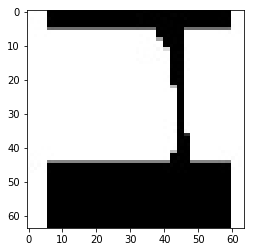

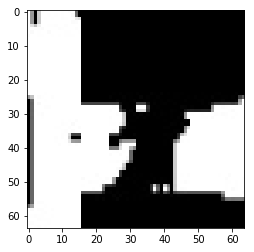

In [107]:
import matplotlib
import matplotlib.pyplot as plt
# display some training images
for i in range(2):
    first_image = X_train[i,:,:,0]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((img_rows, img_cols))
    plt.imshow(pixels, cmap='gray')
    plt.show()

# Use tensorflow

In [17]:
import tensorflow as tf

In [18]:
import tensorflow as tf
import numpy as np
import os
import math

# you need to change this to your data directory
train_dir = './dest/'

def get_files(file_dir, ratio):
    """
    Args:
        file_dir: file directory
        ratio:ratio of validation datasets
    Returns:
        list of images and labels
    """
    #file_name = os.path.join(pic_dir_out,data_name +".pkl")   
    #if os.path.exists(file_name):           #判断之前是否有存到文件中
        #(X_train, y_train), (X_test, y_test) = cPickle.load(open(file_name,"rb"))
        #return (X_train, y_train), (X_test, y_test)  
    
    pic_dir_set = eachFile(file_dir)  
    image_list = []
    label_list = []
    
    label = 0
    for pic_dir in pic_dir_set:
        print(pic_dir_data+pic_dir)
        if not os.path.isdir(os.path.join(pic_dir_data,pic_dir)):
            continue    
        pic_set = eachFile(os.path.join(pic_dir_data,pic_dir))
        pic_index = 0
        
        for pic_name in pic_set:
            if not os.path.isfile(os.path.join(pic_dir_data,pic_dir,pic_name)):
                continue
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name))
            
           
            #img = cv2.imread(os.path.join(pic_dir_data,pic_dir,pic_name),0)
            if 'jpg' not in os.path.join(pic_dir_data,pic_dir,pic_name):
                continue
            
            
            image_list.append(os.path.join(pic_dir_data,pic_dir,pic_name))
            label_list.append(label)          
            
            pic_index += 1
        if len(pic_set) > 0:        
            label += 1
    print('There are %d pic' %(len(image_list)))
    temp = np.array([image_list, label_list])
    temp = temp.transpose()
    np.random.shuffle(temp)

    all_image_list = temp[:, 0]
    all_label_list = temp[:, 1]

    n_sample = len(all_label_list)
    n_val = math.ceil(n_sample*ratio) # number of validation samples
    n_train = n_sample - n_val # number of trainning samples

    tra_images = all_image_list[0:n_train]
    tra_labels = all_label_list[0:n_train]
    tra_labels = [int(float(i)) for i in tra_labels]
    val_images = all_image_list[n_train:-1]
    val_labels = all_label_list[n_train:-1]
    val_labels = [int(float(i)) for i in val_labels]

    return tra_images,tra_labels,val_images,val_labels


def get_batch(image, label, image_W, image_H, batch_size, capacity):
    """
    Args:
        image: list type
        label: list type
        image_W: image width
        image_H: image height
        batch_size: batch size
        capacity: the maximum elements in queue
    Returns:
        image_batch: 4D tensor [batch_size, width, height, 3], dtype=tf.float32
        label_batch: 1D tensor [batch_size], dtype=tf.int32
    """

    image = tf.cast(image, tf.string)
    label = tf.cast(label, tf.int32)

    # make an input queue
    input_queue = tf.train.slice_input_producer([image, label])

    label = input_queue[1]
    image_contents = tf.read_file(input_queue[0])
    image = tf.image.decode_jpeg(image_contents, channels=3)

    image = tf.image.resize_image_with_crop_or_pad(image, image_W, image_H)

    # if you want to test the generated batches of images, you might want to comment the following line.
    image = tf.image.per_image_standardization(image)

    image_batch, label_batch = tf.train.batch([image, label],
                                                batch_size= batch_size,
                                                num_threads= 64,
                                                capacity = capacity)
    #you can also use shuffle_batch
#    image_batch, label_batch = tf.train.shuffle_batch([image,label],
#                                                      batch_size=BATCH_SIZE,
#                                                      num_threads=64,
#                                                      capacity=CAPACITY,
#                                                      min_after_dequeue=CAPACITY-1)

    label_batch = tf.reshape(label_batch, [batch_size])
    image_batch = tf.cast(image_batch, tf.float32)

    return image_batch, label_batch

In [19]:
tra_images,tra_labels,val_images,val_labels = get_files(train_dir,0.1)
image_batch, label_batch = get_batch(tra_images, tra_labels, Width, Height, 32, 200)

fail
.ipynb_checkpoints
pass
./destfail
Porsche.C39WQ0C2K94X_3Y23W2_009146.XRAY_Bottom_Left.jpg
Porsche.C39WQ0BBK94X_3Y23W2_009121.XRAY_Up_Right.jpg
Porsche.C39WQ0CPK94X_3Y23W2_009166.XRAY_Up.jpg
Porsche.C39WQ0BRK94X_3Y23W2_009135.XRAY_Up_Right.jpg
Porsche.C39WQ0DSK94X_3Y23W2_009204.XRAY_Up_Right.jpg
Porsche.C39WQ0D0K94X_3Y23W2_009178.XRAY_Bottom_Left.jpg
Porsche.C39WQ001K946_4S5G2_008718.XRAY_Up.jpg
Porsche.C39WQ00UK946_4S5G2_008683.XRAY_Bottom_Right.jpg
Porsche.C39WQ0DSK94X_3Y23W2_009204.XRAY_Bottom.jpg
Porsche.C39WQ0BDK94X_3Y23W2_009123.XRAY_Bottom_Left.jpg
Porsche.C39WQ0D9K94X_3Y23W2_009187.XRAY_Up_Right.jpg
Porsche.C39WQ00TK960_4W4W1_008823.XRAY_Bottom_Right.jpg
Porsche.C39WQ0BAK94X_3Y23W2_009120.XRAY_Up_Left.jpg
Porsche.C39WQ00UK95G_2Y9W2_005872.XRAY_Bottom.jpg
Porsche.C39WQ0EBK94X_3Y23W2_009223.XRAY_Up.jpg
Porsche.C39WQ00TK961_4G53G2_009975.XRAY_Bottom_Right.jpg
Porsche.C39WQ0ADK950_3W6B1_009621.XRAY_Bottom.jpg
Porsche.C39WQ00TK960_4W4W1_008823.XRAY_Bottom.jpg
Porsche.C39WQ0A3K9

There are 2400 pic
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(tuple(tensor_list)).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.range(limit).shuffle(limit).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instruction

In [104]:
X_train[0:100]

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]

In [72]:
import numpy as np 
np.set_printoptions(threshold=200) 

class Dataset:
    def __init__(self,data,label):    
        self._index_in_epoch = 0
        self._epochs_completed = 0
        self._data = data
        self._label = label
        self._num_examples = data.shape[0]
        pass
    @property
    def data(self):
        return self._data

    @property
    def label(self):
        return self._label

    def next_batch(self,batch_size,shuffle = True):
        start = self._index_in_epoch
        if start == 0 and self._epochs_completed == 0:
            idx = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx)  # shuffle indexe
            self._data = self.data[idx]  # get list of `num` random samples
            self._label = self.label[idx]

        # go to the next batch
        if start + batch_size > self._num_examples:
            self._epochs_completed += 1
            rest_num_examples = self._num_examples - start
            data_rest_part = self.data[start:self._num_examples]
            label_rest_part = self.label[start:self._num_examples]

            idx0 = np.arange(0, self._num_examples)  # get all possible indexes
            np.random.shuffle(idx0)  # shuffle indexes
            self._data = self.data[idx0]  # get list of `num` random samples
            self._label = self.label[idx0]  # get list of `num` random samples

            start = 0
            self._index_in_epoch = batch_size - rest_num_examples #avoid the case where the #sample != integar times of batch_size
            end =  self._index_in_epoch  
            data_new_part =  self._data[start:end]  
            label_new_part =  self._label[start:end]  
            return np.concatenate((data_rest_part, data_new_part), axis=0), np.concatenate((label_rest_part, label_new_part), axis=0)
        else:
            self._index_in_epoch += batch_size
            end = self._index_in_epoch
            return self._data[start:end], self._label[start:end]

In [73]:
iph = Dataset(X_train,y_train)

In [76]:
# Training Parameters
learning_rate = 0.001
num_steps = 200
batch_size = 32
display_step = 10

# Network Parameters
num_input = 64 # MNIST data input (img shape: 28*28)
num_classes = 2 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [batch_size, num_input, num_input,3])
Y = tf.placeholder(tf.float32, [batch_size,])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)


# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 64, 64, 3])
    print(x.shape)
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, 1]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = iph.next_batch(batch_size)
        print(batch_x.shape)
        print(batch_y.shape)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.8})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

  

(32, 64, 64, 3)


ValueError: Dimension size must be evenly divisible by 3136 but is 524288 for 'Reshape_15' (op: 'Reshape') with input shapes: [32,16,16,64], [2] and with input tensors computed as partial shapes: input[1] = [?,3136].

(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 5. Train Loss: 0.78. Train Acc (Test Acc): 44.00 (46.80)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 10. Train Loss: 0.73. Train Acc (Test Acc): 49.00 (51.00)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 15. Train Loss: 0.69. Train Acc (Test Acc): 57.00 (56.80)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 20. Train Loss: 0.63. Train Acc (Test Acc): 67.00 (65.80)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 25. Train Loss: 0.60. Train Acc (Test Acc): 73.00 (66.60)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 30. Train Loss: 0.56. Train Acc (Test Acc): 73.00 (67.60)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 

(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 265. Train Loss: 0.24. Train Acc (Test Acc): 89.00 (91.60)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 270. Train Loss: 0.23. Train Acc (Test Acc): 87.00 (90.00)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 275. Train Loss: 0.23. Train Acc (Test Acc): 90.00 (88.20)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 280. Train Loss: 0.19. Train Acc (Test Acc): 95.00 (87.80)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 285. Train Loss: 0.19. Train Acc (Test Acc): 94.00 (92.80)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 290. Train Loss: 0.23. Train Acc (Test Acc): 91.00 (91.60)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
(100, 64, 64, 3)
Generation # 295. Train 

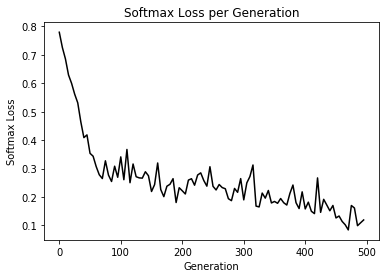

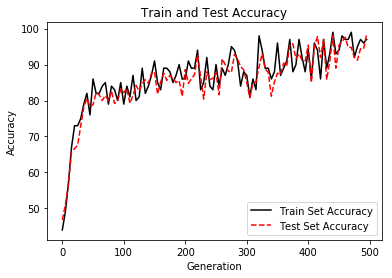

ValueError: cannot reshape array of size 12288 into shape (28,28)

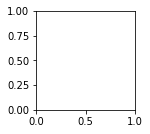

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Start a graph session
sess = tf.Session()

# Load data



train_xdata = X_train / 255.0
test_xdata =X_test / 255.0

# Convert labels into one-hot encoded vectors
train_labels = y_train
test_labels = y_test

# Set model parameters
batch_size = 100
learning_rate = 0.005
evaluation_size = 500
image_width = train_xdata[0].shape[0]
image_height = train_xdata[0].shape[1]
target_size = np.max(train_labels) + 1
num_channels = 3 # greyscale = 1 channel
generations = 500
eval_every = 5
conv1_features = 25
conv2_features = 50
max_pool_size1 = 2  # NxN window for 1st max pool layer
max_pool_size2 = 2  # NxN window for 2nd max pool layer
fully_connected_size1 = 100

# Declare model placeholders
x_input_shape = (batch_size, image_width, image_height, num_channels)
x_input = tf.placeholder(tf.float32, shape=x_input_shape)
y_target = tf.placeholder(tf.int32, shape=(batch_size))
eval_input_shape = (evaluation_size, image_width, image_height, num_channels)
eval_input = tf.placeholder(tf.float32, shape=eval_input_shape)
eval_target = tf.placeholder(tf.int32, shape=(evaluation_size))

# Declare model parameters
conv1_weight = tf.Variable(tf.truncated_normal([4, 4, num_channels, conv1_features],
                                               stddev=0.1, dtype=tf.float32))
conv1_bias = tf.Variable(tf.zeros([conv1_features], dtype=tf.float32))

conv2_weight = tf.Variable(tf.truncated_normal([4, 4, conv1_features, conv2_features],
                                               stddev=0.1, dtype=tf.float32))
conv2_bias = tf.Variable(tf.zeros([conv2_features], dtype=tf.float32))

# fully connected variables
resulting_width = image_width // (max_pool_size1 * max_pool_size2)
resulting_height = image_height // (max_pool_size1 * max_pool_size2)
full1_input_size = resulting_width * resulting_height * conv2_features
full1_weight = tf.Variable(tf.truncated_normal([full1_input_size, fully_connected_size1],
                           stddev=0.1, dtype=tf.float32))
full1_bias = tf.Variable(tf.truncated_normal([fully_connected_size1], stddev=0.1, dtype=tf.float32))
full2_weight = tf.Variable(tf.truncated_normal([fully_connected_size1, target_size],
                                               stddev=0.1, dtype=tf.float32))
full2_bias = tf.Variable(tf.truncated_normal([target_size], stddev=0.1, dtype=tf.float32))


# Initialize Model Operations
def my_conv_net(conv_input_data):
    # First Conv-ReLU-MaxPool Layer
    conv1 = tf.nn.conv2d(conv_input_data, conv1_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    max_pool1 = tf.nn.max_pool(relu1, ksize=[1, max_pool_size1, max_pool_size1, 1],
                               strides=[1, max_pool_size1, max_pool_size1, 1], padding='SAME')

    # Second Conv-ReLU-MaxPool Layer
    conv2 = tf.nn.conv2d(max_pool1, conv2_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
    max_pool2 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size2, max_pool_size2, 1],
                               strides=[1, max_pool_size2, max_pool_size2, 1], padding='SAME')

    # Transform Output into a 1xN layer for next fully connected layer
    final_conv_shape = max_pool2.get_shape().as_list()
    final_shape = final_conv_shape[1] * final_conv_shape[2] * final_conv_shape[3]
    flat_output = tf.reshape(max_pool2, [final_conv_shape[0], final_shape])

    # First Fully Connected Layer
    fully_connected1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full1_weight), full1_bias))

    # Second Fully Connected Layer
    final_model_output = tf.add(tf.matmul(fully_connected1, full2_weight), full2_bias)
    
    return final_model_output

model_output = my_conv_net(x_input)
test_model_output = my_conv_net(eval_input)

# Declare Loss Function (softmax cross entropy)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model_output, labels=y_target))

# Create a prediction function
prediction = tf.nn.softmax(model_output)
test_prediction = tf.nn.softmax(test_model_output)


# Create accuracy function
def get_accuracy(logits, targets):
    batch_predictions = np.argmax(logits, axis=1)
    num_correct = np.sum(np.equal(batch_predictions, targets))
    return 100. * num_correct/batch_predictions.shape[0]

# Create an optimizer
my_optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9)
train_step = my_optimizer.minimize(loss)

# Initialize Variables
init = tf.global_variables_initializer()
sess.run(init)

# Start training loop
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
    rand_index = np.random.choice(len(train_xdata), size=batch_size)
    rand_x = train_xdata[rand_index]
    #rand_x = np.expand_dims(rand_x, 3)
    print(rand_x.shape)
    rand_y = train_labels[rand_index]
    train_dict = {x_input: rand_x, y_target: rand_y}
    
    sess.run(train_step, feed_dict=train_dict)
    temp_train_loss, temp_train_preds = sess.run([loss, prediction], feed_dict=train_dict)
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(test_xdata), size=evaluation_size)
        eval_x = test_xdata[eval_index]
       # eval_x = np.expand_dims(eval_x, 3)
        eval_y = test_labels[eval_index]
        test_dict = {eval_input: eval_x, eval_target: eval_y}
        test_preds = sess.run(test_prediction, feed_dict=test_dict)
        temp_test_acc = get_accuracy(test_preds, eval_y)
        
        # Record and print results
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc, temp_test_acc]
        acc_and_loss = [np.round(x, 2) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))
    
    
# Matlotlib code to plot the loss and accuracies
eval_indices = range(0, generations, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()

# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot some samples
# Plot the 6 of the last batch results:
actuals = rand_y[0:6]
predictions = np.argmax(temp_train_preds, axis=1)[0:6]
images = np.squeeze(rand_x[0:6])

Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [28, 28]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
              fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

In [ ]:
import numpy as np

def next_batch(train_data, train_target, batch_size):  
    index = [ i for i in range(0,len(train_target)) ]  
    np.random.shuffle(index);  
    batch_data = []; 
    batch_target = [];  
    for i in range(0,batch_size):  
        batch_data.append(train_data[index[i]]);  
        batch_target.append(train_target[index[i]])  
    return batch_data, batch_target  

# Use keras

In [110]:
# convert class vectors to binary class matrices (one hot vectors)
y_train = keras.utils.to_categorical(np.squeeze(y_train), num_classes)
y_test = keras.utils.to_categorical(np.squeeze(y_test), num_classes)

In [81]:
#input_shape = (img_rows, img_cols, 1)
model=Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', input_shape=(img_rows, img_cols,3), activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))

model.add(Dense(2, activation='softmax'))

# lenet

In [111]:
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
batch_size    = 128
epochs        = 200
iterations    = 391
num_classes   = 2
mean          = [125.307, 122.95, 113.865]
std           = [62.9932, 62.0887, 66.7048]

def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(img_rows, img_cols,3)))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(2, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 150:
        return 0.005
    return 0.001

In [112]:
model = build_model()
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr]

    # using real-time data augmentation
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=100,
              verbose=1,
              callbacks=cbks,
              validation_data=(X_test, y_test))

Train on 2160 samples, validate on 240 samples
Epoch 1/100
2160/2160 [==============================] - 2s 1ms/step - loss: 0.8247 - acc: 0.5222 - val_loss: 0.6803 - val_acc: 0.6000
Epoch 2/100
2160/2160 [==============================] - 2s 919us/step - loss: 0.6555 - acc: 0.6912 - val_loss: 0.6173 - val_acc: 0.6500
Epoch 3/100
2160/2160 [==============================] - 2s 902us/step - loss: 0.5080 - acc: 0.7671 - val_loss: 0.4768 - val_acc: 0.7583
Epoch 4/100
2160/2160 [==============================] - 2s 915us/step - loss: 0.3447 - acc: 0.7995 - val_loss: 0.2918 - val_acc: 0.8750
Epoch 5/100
2160/2160 [==============================] - 2s 901us/step - loss: 0.2762 - acc: 0.8509 - val_loss: 0.2747 - val_acc: 0.8458
Epoch 6/100
2160/2160 [==============================] - 2s 903us/step - loss: 0.2443 - acc: 0.8861 - val_loss: 0.2413 - val_acc: 0.8292
Epoch 7/100
2160/2160 [==============================] - 2s 928us/step - loss: 0.2239 - acc: 0.9153 - val_loss: 0.2095 - val_acc: 0.9

2160/2160 [==============================] - 2s 900us/step - loss: 0.0121 - acc: 0.9972 - val_loss: 0.0827 - val_acc: 0.9917
Epoch 61/100
2160/2160 [==============================] - 2s 909us/step - loss: 0.0111 - acc: 0.9977 - val_loss: 0.0863 - val_acc: 0.9875
Epoch 62/100
2160/2160 [==============================] - 2s 918us/step - loss: 0.0082 - acc: 0.9981 - val_loss: 0.0808 - val_acc: 0.9875
Epoch 63/100
2160/2160 [==============================] - 2s 950us/step - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0771 - val_acc: 0.9958
Epoch 64/100
2160/2160 [==============================] - 2s 911us/step - loss: 0.0080 - acc: 0.9977 - val_loss: 0.0888 - val_acc: 0.9875
Epoch 65/100
2160/2160 [==============================] - 2s 926us/step - loss: 0.0115 - acc: 0.9972 - val_loss: 0.0897 - val_acc: 0.9917
Epoch 66/100
2160/2160 [==============================] - 2s 928us/step - loss: 0.0070 - acc: 0.9986 - val_loss: 0.0967 - val_acc: 0.9833
Epoch 67/100
2160/2160 [=======================

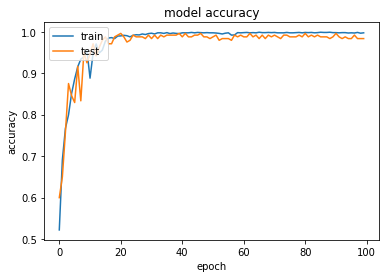

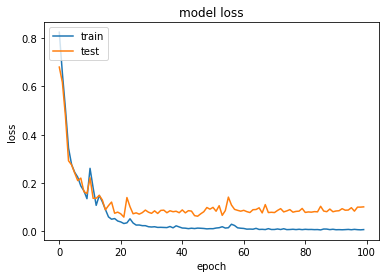

In [113]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LeNet + l2

In [116]:
import keras
import numpy as np
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

batch_size    = 128
epochs        = 200
iterations    = 391
num_classes   = 2
weight_decay  = 0.0001
mean          = [125.307, 122.95, 113.865]
std           = [62.9932, 62.0887, 66.7048]

def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay), input_shape=(64,64,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay) ))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay) ))
    model.add(Dense(2, activation = 'softmax', kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay) ))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 150:
        return 0.005
    return 0.001

In [118]:
model = build_model()
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr]
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=200,
              verbose=1,
              callbacks=cbks,
              validation_data=(X_test, y_test))

Train on 2160 samples, validate on 240 samples
Epoch 1/200
2160/2160 [==============================] - 3s 1ms/step - loss: 0.8117 - acc: 0.5944 - val_loss: 0.6511 - val_acc: 0.7333
Epoch 2/200
2160/2160 [==============================] - 2s 910us/step - loss: 0.5303 - acc: 0.7954 - val_loss: 0.4108 - val_acc: 0.8125
Epoch 3/200
2160/2160 [==============================] - 2s 915us/step - loss: 0.3737 - acc: 0.7972 - val_loss: 0.3352 - val_acc: 0.8042
Epoch 4/200
2160/2160 [==============================] - 2s 912us/step - loss: 0.3504 - acc: 0.8148 - val_loss: 0.3529 - val_acc: 0.7875
Epoch 5/200
2160/2160 [==============================] - 2s 954us/step - loss: 0.3527 - acc: 0.8125 - val_loss: 0.3503 - val_acc: 0.8042
Epoch 6/200
2160/2160 [==============================] - 2s 917us/step - loss: 0.3245 - acc: 0.8148 - val_loss: 0.3234 - val_acc: 0.8208
Epoch 7/200
2160/2160 [==============================] - 2s 920us/step - loss: 0.3116 - acc: 0.8171 - val_loss: 0.3358 - val_acc: 0.8

2160/2160 [==============================] - 2s 911us/step - loss: 0.2974 - acc: 0.8347 - val_loss: 0.3507 - val_acc: 0.8417
Epoch 61/200
2160/2160 [==============================] - 2s 908us/step - loss: 0.2978 - acc: 0.8273 - val_loss: 0.3515 - val_acc: 0.8500
Epoch 62/200
2160/2160 [==============================] - 2s 887us/step - loss: 0.2958 - acc: 0.8389 - val_loss: 0.3477 - val_acc: 0.8500
Epoch 63/200
2160/2160 [==============================] - 2s 920us/step - loss: 0.2955 - acc: 0.8394 - val_loss: 0.3355 - val_acc: 0.8458
Epoch 64/200
2160/2160 [==============================] - 2s 916us/step - loss: 0.2977 - acc: 0.8384 - val_loss: 0.3443 - val_acc: 0.8500
Epoch 65/200
2160/2160 [==============================] - 2s 916us/step - loss: 0.2952 - acc: 0.8407 - val_loss: 0.3489 - val_acc: 0.8458
Epoch 66/200
2160/2160 [==============================] - 2s 915us/step - loss: 0.2956 - acc: 0.8412 - val_loss: 0.3417 - val_acc: 0.8417
Epoch 67/200
2160/2160 [=======================

2160/2160 [==============================] - 2s 911us/step - loss: 0.2709 - acc: 0.8852 - val_loss: 0.3265 - val_acc: 0.8667
Epoch 120/200
2160/2160 [==============================] - 2s 916us/step - loss: 0.2723 - acc: 0.8769 - val_loss: 0.3850 - val_acc: 0.8500
Epoch 121/200
2160/2160 [==============================] - 2s 938us/step - loss: 0.2897 - acc: 0.8477 - val_loss: 0.3718 - val_acc: 0.8542
Epoch 122/200
2160/2160 [==============================] - 2s 926us/step - loss: 0.2749 - acc: 0.8838 - val_loss: 0.3506 - val_acc: 0.8625
Epoch 123/200
2160/2160 [==============================] - 2s 930us/step - loss: 0.2712 - acc: 0.8838 - val_loss: 0.6843 - val_acc: 0.7667
Epoch 124/200
2160/2160 [==============================] - 2s 914us/step - loss: 0.3699 - acc: 0.8111 - val_loss: 0.4369 - val_acc: 0.7750
Epoch 125/200
2160/2160 [==============================] - 2s 927us/step - loss: 0.3645 - acc: 0.8125 - val_loss: 0.4301 - val_acc: 0.7958
Epoch 126/200
2160/2160 [================

2160/2160 [==============================] - 2s 957us/step - loss: 0.2926 - acc: 0.8324 - val_loss: 0.3684 - val_acc: 0.8167
Epoch 179/200
2160/2160 [==============================] - 2s 905us/step - loss: 0.2926 - acc: 0.8241 - val_loss: 0.3689 - val_acc: 0.8167
Epoch 180/200
2160/2160 [==============================] - 2s 952us/step - loss: 0.2927 - acc: 0.8324 - val_loss: 0.3712 - val_acc: 0.8167
Epoch 181/200
2160/2160 [==============================] - 2s 929us/step - loss: 0.2927 - acc: 0.8319 - val_loss: 0.3671 - val_acc: 0.8167
Epoch 182/200
2160/2160 [==============================] - 2s 898us/step - loss: 0.2926 - acc: 0.8319 - val_loss: 0.3683 - val_acc: 0.8167
Epoch 183/200
2160/2160 [==============================] - 2s 916us/step - loss: 0.2925 - acc: 0.8264 - val_loss: 0.3712 - val_acc: 0.8167
Epoch 184/200
2160/2160 [==============================] - 2s 927us/step - loss: 0.2925 - acc: 0.8319 - val_loss: 0.3683 - val_acc: 0.8167
Epoch 185/200
2160/2160 [================

# network in network

In [131]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
batch_size    = 128
epochs        = 200
iterations    = 391
num_classes   = 2
dropout       = 0.5
weight_decay  = 0.0001
def build_model():
  model = Sequential()

  model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(160, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))
  
  model.add(Dropout(dropout))
  
  model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))
  
  model.add(Dropout(dropout))
  
  model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(2, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  
  sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
  return model


In [134]:
model = build_model()
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr]
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=200,
              verbose=1,
              callbacks=cbks,
              validation_data=(X_test, y_test))

Train on 2160 samples, validate on 240 samples
Epoch 1/200
2160/2160 [==============================] - 47s 22ms/step - loss: 0.8127 - acc: 0.5000 - val_loss: 0.8128 - val_acc: 0.5000
Epoch 2/200
2160/2160 [==============================] - 45s 21ms/step - loss: 0.8127 - acc: 0.5000 - val_loss: 0.8128 - val_acc: 0.5000
Epoch 3/200
2160/2160 [==============================] - 45s 21ms/step - loss: 0.8127 - acc: 0.5000 - val_loss: 0.8128 - val_acc: 0.5000
Epoch 4/200
2160/2160 [==============================] - 44s 21ms/step - loss: 0.8126 - acc: 0.5000 - val_loss: 0.8128 - val_acc: 0.5000
Epoch 5/200
2160/2160 [==============================] - 44s 21ms/step - loss: 0.8126 - acc: 0.5000 - val_loss: 0.8127 - val_acc: 0.5000
Epoch 6/200
2160/2160 [==============================] - 45s 21ms/step - loss: 0.8126 - acc: 0.5000 - val_loss: 0.8127 - val_acc: 0.5000
Epoch 7/200
2160/2160 [==============================] - 46s 21ms/step - loss: 0.8126 - acc: 0.5000 - val_loss: 0.8127 - val_acc: 0

KeyboardInterrupt: 

# resnet

In [151]:
stack_n            = 5
layers             = 6 * stack_n + 2
num_classes        = 2
img_rows, img_cols = 64, 64
img_channels       = 3
batch_size         = 128
epochs             = 200
iterations         = 50000 // batch_size + 1
weight_decay       = 1e-4
from keras.models import Model
from keras.layers import Conv2D, Dense, Input, add, Activation, GlobalAveragePooling2D
from keras import optimizers, regularizers
from keras.layers.normalization import BatchNormalization

In [152]:
def scheduler(epoch):
    if epoch < 81:
        return 0.1
    if epoch < 122:
        return 0.01
    return 0.001


def residual_network(img_input,classes_num=2,stack_n=5):
    
    def residual_block(x,o_filters,increase=False):
        stride = (1,1)
        if increase:
            stride = (2,2)

        o1 = Activation('relu')(BatchNormalization(momentum=0.9, epsilon=1e-5)(x))
        conv_1 = Conv2D(o_filters,kernel_size=(3,3),strides=stride,padding='same',
                        kernel_initializer="he_normal",
                        kernel_regularizer=regularizers.l2(weight_decay))(o1)
        o2  = Activation('relu')(BatchNormalization(momentum=0.9, epsilon=1e-5)(conv_1))
        conv_2 = Conv2D(o_filters,kernel_size=(3,3),strides=(1,1),padding='same',
                        kernel_initializer="he_normal",
                        kernel_regularizer=regularizers.l2(weight_decay))(o2)
        if increase:
            projection = Conv2D(o_filters,kernel_size=(1,1),strides=(2,2),padding='same',
                                kernel_initializer="he_normal",
                                kernel_regularizer=regularizers.l2(weight_decay))(o1)
            block = add([conv_2, projection])
        else:
            block = add([conv_2, x])
        return block

    # build model ( total layers = stack_n * 3 * 2 + 2 )
    # stack_n = 5 by default, total layers = 32
    # input: 32x32x3 output: 32x32x16
    x = Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',
               kernel_initializer="he_normal",
               kernel_regularizer=regularizers.l2(weight_decay))(img_input)

    # input: 32x32x16 output: 32x32x16
    for _ in range(stack_n):
        x = residual_block(x,16,False)

    # input: 32x32x16 output: 16x16x32
    x = residual_block(x,32,True)
    for _ in range(1,stack_n):
        x = residual_block(x,32,False)
    
    # input: 16x16x32 output: 8x8x64
    x = residual_block(x,64,True)
    for _ in range(1,stack_n):
        x = residual_block(x,64,False)

    x = BatchNormalization(momentum=0.9, epsilon=1e-5)(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)

    # input: 64 output: 2
    x = Dense(classes_num,activation='softmax',kernel_initializer="he_normal",
              kernel_regularizer=regularizers.l2(weight_decay))(x)
    return x

In [153]:
    print("== DONE! ==\n== BUILD MODEL... ==")
    # build network
    img_input = Input(shape=(img_rows,img_cols,img_channels))
    output    = residual_network(img_input,num_classes,stack_n)
    resnet    = Model(img_input, output)
    
    # print model architecture if you need.
    # print(resnet.summary())


    # set optimizer
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    resnet.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    # set callback
    cbks = [LearningRateScheduler(scheduler)]
    
    # dump checkpoint if you need.(add it to cbks)
    # ModelCheckpoint('./checkpoint-{epoch}.h5', save_best_only=False, mode='auto', period=10)

    # set data augmentation
    print("== USING REAL-TIME DATA AUGMENTATION, START TRAIN... ==")
    history = resnet.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=200,
              verbose=1,
              callbacks=cbks,
              validation_data=(X_test, y_test))

== DONE! ==
== BUILD MODEL... ==
== USING REAL-TIME DATA AUGMENTATION, START TRAIN... ==
Train on 2160 samples, validate on 240 samples
Epoch 1/200
2160/2160 [==============================] - 76s 35ms/step - loss: 0.7022 - acc: 0.7491 - val_loss: 4.9537 - val_acc: 0.5042
Epoch 2/200
2160/2160 [==============================] - 69s 32ms/step - loss: 0.5210 - acc: 0.8671 - val_loss: 8.1470 - val_acc: 0.5000
Epoch 3/200
2160/2160 [==============================] - 69s 32ms/step - loss: 0.4620 - acc: 0.9083 - val_loss: 4.3763 - val_acc: 0.5458
Epoch 4/200
2160/2160 [==============================] - 69s 32ms/step - loss: 0.4537 - acc: 0.9148 - val_loss: 1.5638 - val_acc: 0.7625
Epoch 5/200
2160/2160 [==============================] - 68s 31ms/step - loss: 0.3536 - acc: 0.9676 - val_loss: 0.4106 - val_acc: 0.9667
Epoch 6/200
2160/2160 [==============================] - 69s 32ms/step - loss: 0.2931 - acc: 0.9894 - val_loss: 0.8548 - val_acc: 0.8542
Epoch 7/200
2160/2160 [===================

KeyboardInterrupt: 

In [82]:
import sklearn
import keras
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               692480    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total para

In [83]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [84]:
# training
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=100,
              verbose=1,
              validation_data=(X_test, y_test))

Train on 2160 samples, validate on 240 samples
Epoch 1/100
2160/2160 [==============================] - 2s 1ms/step - loss: 2.2180 - acc: 0.6231 - val_loss: 0.3353 - val_acc: 0.8458
Epoch 2/100
2160/2160 [==============================] - 2s 926us/step - loss: 0.3754 - acc: 0.8227 - val_loss: 0.3724 - val_acc: 0.8125
Epoch 3/100
2160/2160 [==============================] - 2s 948us/step - loss: 0.3174 - acc: 0.8431 - val_loss: 0.2225 - val_acc: 0.9333
Epoch 4/100
2160/2160 [==============================] - 2s 924us/step - loss: 0.2499 - acc: 0.8963 - val_loss: 0.3393 - val_acc: 0.8125
Epoch 5/100
2160/2160 [==============================] - 2s 939us/step - loss: 0.4029 - acc: 0.8505 - val_loss: 0.3089 - val_acc: 0.8417
Epoch 6/100
2160/2160 [==============================] - 2s 925us/step - loss: 0.3159 - acc: 0.8630 - val_loss: 0.3444 - val_acc: 0.8208
Epoch 7/100
2160/2160 [==============================] - 2s 925us/step - loss: 0.2005 - acc: 0.9157 - val_loss: 0.9634 - val_acc: 0.5

2160/2160 [==============================] - 2s 939us/step - loss: 0.2746 - acc: 0.8866 - val_loss: 0.2141 - val_acc: 0.8917
Epoch 61/100
2160/2160 [==============================] - 2s 942us/step - loss: 0.1206 - acc: 0.9500 - val_loss: 0.1540 - val_acc: 0.9583
Epoch 62/100
2160/2160 [==============================] - 2s 942us/step - loss: 0.0779 - acc: 0.9699 - val_loss: 0.0970 - val_acc: 0.9750
Epoch 63/100
2160/2160 [==============================] - 2s 936us/step - loss: 0.0692 - acc: 0.9755 - val_loss: 0.1331 - val_acc: 0.9583
Epoch 64/100
2160/2160 [==============================] - 2s 942us/step - loss: 0.0607 - acc: 0.9801 - val_loss: 0.0853 - val_acc: 0.9792
Epoch 65/100
2160/2160 [==============================] - 2s 946us/step - loss: 0.0410 - acc: 0.9875 - val_loss: 0.7132 - val_acc: 0.8333
Epoch 66/100
2160/2160 [==============================] - 2s 927us/step - loss: 0.1557 - acc: 0.9417 - val_loss: 0.1167 - val_acc: 0.9542
Epoch 67/100
2160/2160 [=======================

In [28]:
# print train and test losses and classification accuracies
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.03906184368663364
Train accuracy: 0.9861111111111112
Test loss: 0.09258520007133483
Test accuracy: 0.95


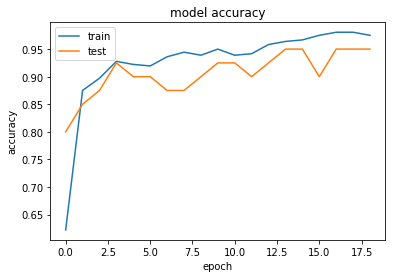

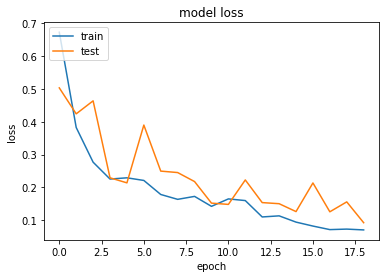

In [29]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
pre = model.predict(X_test,verbose=1)

300/300 [==============================] - 0s 185us/step


In [40]:
pre

array([[9.99993324e-01, 6.65779226e-06],
       [9.99999642e-01, 3.88705047e-07],
       [9.99989152e-01, 1.08105160e-05],
       [1.00000000e+00, 5.41648504e-08],
       [9.99649882e-01, 3.50162736e-04],
       [9.99999881e-01, 1.30236671e-07],
       [9.99998689e-01, 1.31648176e-06],
       [9.99999523e-01, 5.11486235e-07],
       [1.00000000e+00, 5.56942901e-08],
       [9.99998808e-01, 1.14470458e-06],
       [9.99999762e-01, 2.67845707e-07],
       [9.99989629e-01, 1.03855555e-05],
       [9.99985099e-01, 1.49033913e-05],
       [9.99998212e-01, 1.76467972e-06],
       [9.99999046e-01, 9.39084146e-07],
       [9.99999762e-01, 2.18750273e-07],
       [9.99997616e-01, 2.40886902e-06],
       [9.99998927e-01, 1.03541174e-06],
       [9.99999285e-01, 7.65519644e-07],
       [9.99998689e-01, 1.31080651e-06],
       [9.97931719e-01, 2.06830888e-03],
       [9.99999404e-01, 6.25977464e-07],
       [9.99999523e-01, 5.03811407e-07],
       [9.99992609e-01, 7.39565485e-06],
       [9.999855

In [68]:
prediction = np.argmax(pre,axis = 1)

In [53]:
prediction.shape

(2160,)

In [75]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       240
          1       0.95      0.97      0.96        60

avg / total       0.98      0.98      0.98       300



In [19]:
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras import regularizers
model = Sequential()
model.add(Conv2D(128, (5, 5), strides = 2,
                     padding='valid',  
                     activation = 'relu',
                     input_shape=[img_rows, img_cols, 3], name = 'conv1'))
model.add(Conv2D(128, (5, 5), strides = 2,
                     padding='valid', 
                     activation = 'relu',
                     name = 'conv2'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(MaxPooling2D(pool_size=(13, 13), strides= 13 ))
model.add(Flatten())
model.add(Dropout(.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=Adam(),
           metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 128)       9728      
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total para

In [21]:
# training
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=100,
              verbose=1,
              validation_data=(X_test, y_test))

Train on 2160 samples, validate on 240 samples
Epoch 1/100
2160/2160 [==============================] - 2s 1ms/step - loss: 0.5622 - acc: 0.6778 - val_loss: 0.7746 - val_acc: 0.5000
Epoch 2/100
2160/2160 [==============================] - 1s 315us/step - loss: 0.3431 - acc: 0.8167 - val_loss: 0.7179 - val_acc: 0.5000
Epoch 3/100
2160/2160 [==============================] - 1s 299us/step - loss: 0.2779 - acc: 0.8440 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 4/100
2160/2160 [==============================] - 1s 311us/step - loss: 0.2726 - acc: 0.8449 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 5/100
2160/2160 [==============================] - 1s 306us/step - loss: 0.2710 - acc: 0.8435 - val_loss: 0.6917 - val_acc: 0.5333
Epoch 6/100
2160/2160 [==============================] - 1s 304us/step - loss: 0.2442 - acc: 0.8542 - val_loss: 0.6968 - val_acc: 0.5000
Epoch 7/100
2160/2160 [==============================] - 1s 299us/step - loss: 0.2371 - acc: 0.8565 - val_loss: 0.6946 - val_acc: 0.5

Epoch 60/100
2160/2160 [==============================] - 1s 317us/step - loss: 0.0331 - acc: 0.9903 - val_loss: 0.0322 - val_acc: 0.9958
Epoch 61/100
2160/2160 [==============================] - 1s 315us/step - loss: 0.0319 - acc: 0.9898 - val_loss: 0.1135 - val_acc: 0.9583
Epoch 62/100
2160/2160 [==============================] - 1s 317us/step - loss: 0.0443 - acc: 0.9866 - val_loss: 0.0346 - val_acc: 0.9875
Epoch 63/100
2160/2160 [==============================] - 1s 325us/step - loss: 0.0411 - acc: 0.9870 - val_loss: 0.0920 - val_acc: 0.9667
Epoch 64/100
2160/2160 [==============================] - 1s 312us/step - loss: 0.0352 - acc: 0.9907 - val_loss: 0.0673 - val_acc: 0.9708
Epoch 65/100
2160/2160 [==============================] - 1s 318us/step - loss: 0.0369 - acc: 0.9903 - val_loss: 0.0299 - val_acc: 0.9917
Epoch 66/100
2160/2160 [==============================] - 1s 310us/step - loss: 0.0334 - acc: 0.9917 - val_loss: 0.0597 - val_acc: 0.9750
Epoch 67/100
2160/2160 [==========

In [42]:
# training
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=40,
              verbose=1,
              validation_data=(X_test, y_test))

ValueError: Error when checking input: expected conv1_input to have 4 dimensions, but got array with shape (0, 1)

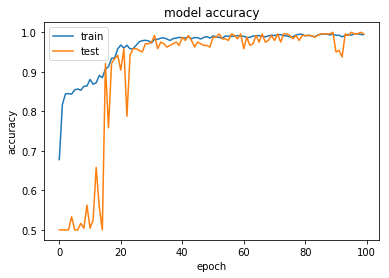

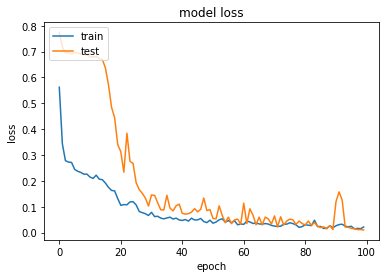

In [22]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               692480    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total para

In [45]:
model.save('./bottom_left.h5')

In [52]:
model.save('./up.h5')

In [22]:
model.save('./bottom.h5')

In [21]:
model.save('./bottom_right.h5')

In [22]:
model.save('./up_right.h5')

In [23]:
model.save('./up_left.h5')

In [25]:
model.save('./all.h5')

In [55]:
def plot_confusion_matrix(y_true, y_pred, labels):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    cmap = plt.cm.binary
    cm = confusion_matrix(y_true, y_pred)
    tick_marks = np.array(range(len(labels))) + 0.5
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8), dpi=120)
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    intFlag = 0 # 标记在图片中对文字是整数型还是浮点型
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        #

        if (intFlag):
            c = cm[y_val][x_val]
            plt.text(x_val, y_val, "%d" % (c,), color='red', fontsize=8, va='center', ha='center')

        else:
            c = cm_normalized[y_val][x_val]
            if (c > 0.01):
                #这里是绘制数字，可以对数字大小和颜色进行修改
                plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=10, va='center', ha='center')
            else:
                plt.text(x_val, y_val, "%d" % (0,), color='red', fontsize=10, va='center', ha='center')
    if(intFlag):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
    else:
        plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.title('')
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('Index of True Classes')
    plt.xlabel('Index of Predict Classes')
    #plt.savefig('confusion_matrix.jpg', dpi=300)
    plt.show()

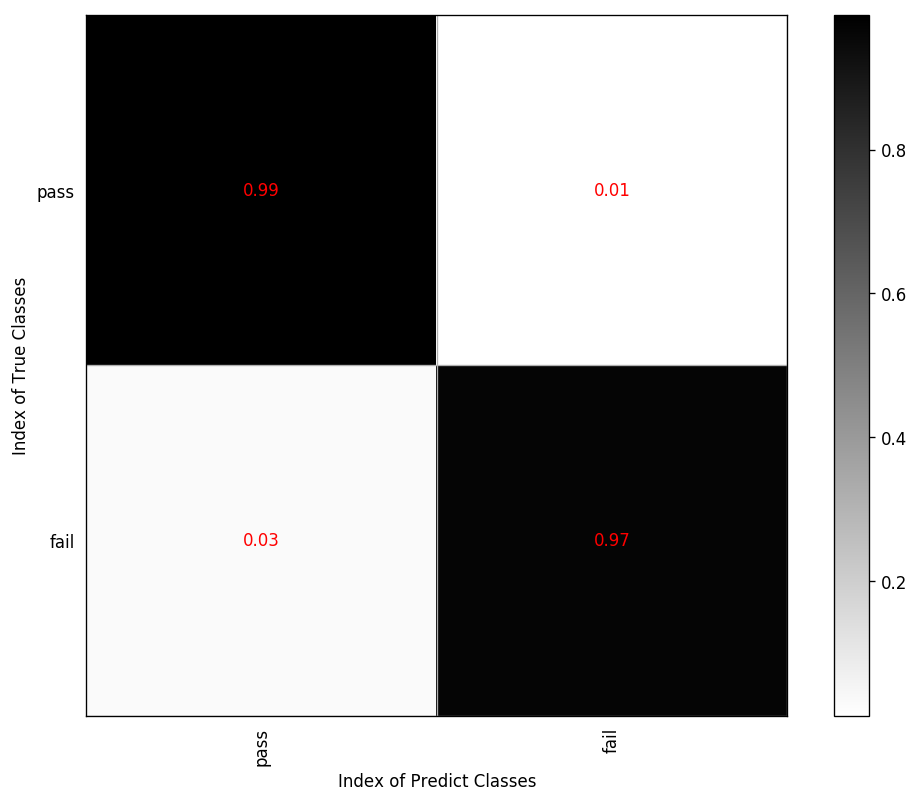

In [69]:
labels = ['pass','fail']
plot_confusion_matrix(y_test, prediction,labels)